# Contents
- [Importing Libraries](#Importing-Libraries)
- [Exploratory Data Analysis](#EDA)
    - [Explore Dataframe](##Exploring-Dataframe)
    - [Handling Missing Values](#Missing-Values)
        - [Handling NaN Values](#Handling-NaN-values)
    - [Merge two attriubes]()
    - [World Cloud](#World-Cloud)
- [Train Validate Test](#Train,-Validate-and-Test) 
 
- [Navie Bayes Model](##Navie-Bayes-Model)

## Importing Libraries

In [3]:
import pandas as pd
import numpy as np
from matplotlib.pylab import plt
import seaborn as sns
from wordcloud import WordCloud

In [4]:
df = pd.read_csv("real-dataset/WELFake_Dataset.csv")

## EDA
Exploratory Data Analysis includes data exploration, handling missing values.

### Exploring Dataframe

In [5]:
df.head(6)

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
5,5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1


In [6]:
df.shape

(72134, 4)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,72134.0,36066.500000,20823.436496,0.0,18033.25,36066.5,54099.75,72133.0
label,72134.0,0.514404,0.499796,0.0,0.00,1.0,1.00,1.0


In [8]:
# title attribute of first instance/tuple/row.
df.head(1).title

0    LAW ENFORCEMENT ON HIGH ALERT Following Threat...
Name: title, dtype: object

In [9]:
df.loc[4, 'title']

'SATAN 2: Russia unvelis an image of its terrifying new ‘SUPERNUKE’ – Western world takes notice'

In [10]:
# get full information of that tuple.
df.loc[4, 'text']

'The RS-28 Sarmat missile, dubbed Satan 2, will replace the SS-18 Flies at 4.3 miles (7km) per sec and with a range of 6,213 miles (10,000km) The weapons are perceived as part of an increasingly aggressive Russia It could deliver a warhead of 40 megatons – 2,000 times as powerful as the atom bombs dropped on Hiroshima and Nagasaki in 1945 By LIBBY PLUMMER and GARETH DAVIE S Russia has unveiled chilling pictures of its largest ever nuclear missile, capable of destroying an area the size of France. The RS-28 Sarmat missile, dubbed Satan 2 by Nato, has a top speed of 4.3 miles (7km) per second and has been designed to outfox anti-missile shield systems. The new Sarmat missile could deliver warheads of 40 megatons – 2,000 times as powerful as the atom bombs dropped on Hiroshima and Nagasaki in 1945. Scroll down for video Russian President Vladimir Putin is reportedly planning to replace the country’s older SS-18 Satan weapons with the new missiles amid a string of recent disagreements with

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  72134 non-null  int64 
 1   title       71576 non-null  object
 2   text        72095 non-null  object
 3   label       72134 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


**label** attribute is target attribute. <br />
0: Fake news <br />
1: Real news

In [12]:
df['label'].value_counts()

label
1    37106
0    35028
Name: count, dtype: int64

In [13]:
# Replace 1 and 0 by Real and Fake (news).

df['label'] = df['label'].replace({1: 'Real', 0: 'Fake'})

In [14]:
df['label'].value_counts()

label
Real    37106
Fake    35028
Name: count, dtype: int64

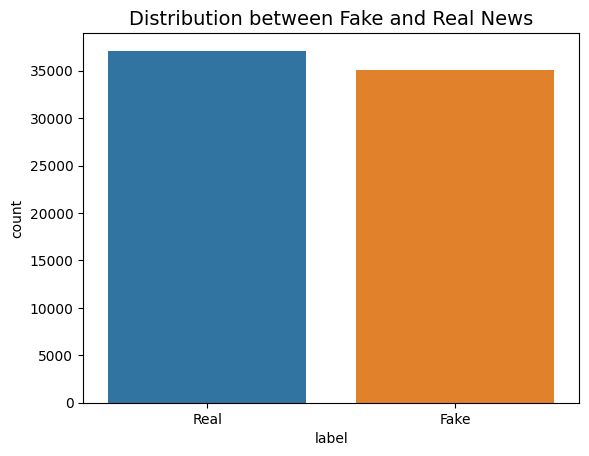

In [15]:
class_names = ['Fake', 'Real'] 
label_count = df.label.value_counts()
sns.barplot(x=label_count.index, y=label_count)
plt.title('Distribution between Fake and Real News',fontsize =14)
plt.show()

**Unnamed: 0** attribute is just like index so drop this attribute

In [16]:
df.drop(["Unnamed: 0"], axis=1, inplace=True)

In [17]:
df.sample(4)

,title,text,label
49456,The GOP Congress Just Moved To Let Big Banks ...,The biggest threat to the oligarchy is for the...,Real
54710,A Troubled King: Chicago’s Rahm Emanuel Desper...,21st Century Wire says It s not that far away....,Real
29079,KARMA? PODIUM COLLAPSES At Hillary Rally [Video],Hillary Clinton was all smiles at a rally in C...,Real
41026,Billionaire Is Reported Seized From Hong Kong ...,HONG KONG — A billionaire who has forged ...,Fake


### Missing Values

In [18]:
df.isnull().sum()

title    558
text      39
label      0
dtype: int64

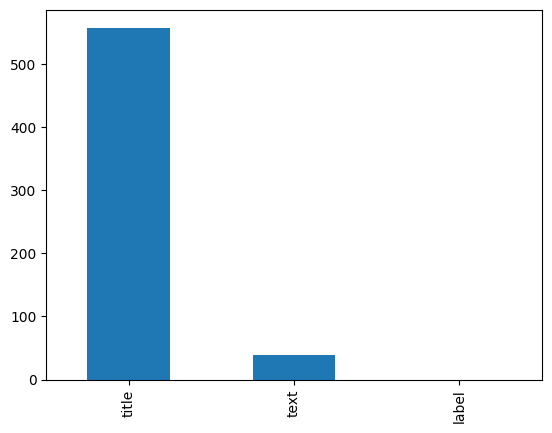

In [19]:
df.isnull().sum().plot(kind='bar')
plt.show()

In [20]:
# List of attributes to check for missing values
attributes = ['title', 'text', 'label']

# Calculate the percentage of missing values for each attribute
for attribute in attributes:
    percentage = df[attribute].isnull().mean() * 100
    print(f'{attribute} = {percentage:.2f}%')

title = 0.77%
text = 0.05%
label = 0.00%



*title* attriubute got >1% of missing values.

In [24]:
# view null rows
null_rows = df[df.isnull().any(axis=1)]
#null_rows

In [25]:
# view null rows of 'text' attribute
null_rows_text = df[df['text'].isnull()]
#null_rows_text

#### Findings 
NaN is present in 'title' and 'text' attribute of Real news

#### Handling NaN values 

In [26]:
# filling NaN values with '' empty string
df = df.fillna('')

In [27]:
# view null rows
df[df.isnull().any(axis=1)]

# No NaN values present.

,title,text,label


In [28]:
df.isnull().sum()

title    0
text     0
label    0
dtype: int64

In [29]:
df.nunique()

title    62348
text     62719
label        2
dtype: int64

### Merging 'title' and 'text' attribute

In [42]:
df['content'] = df['title'] + df['text']
df['length'] = df['content'].apply(lambda x: len(x) - x.count(' '))

In [43]:
df.head(6)

,title,text,label,content,length
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,Real,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,4222
1,,Did they post their votes for Hillary already?,Real,Did they post their votes for Hillary already?,39
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",Real,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,299
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,Fake,"Bobby Jindal, raised Hindu, uses story of Chri...",6811
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",Real,SATAN 2: Russia unvelis an image of its terrif...,1668
5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,Real,About Time! Christian Group Sues Amazon and SP...,1342


In [32]:
# Construct new df with selected attributes.
# new_attributes = ['label', 'words_count']
# new_df = pd.DataFrame(df[new_attributes])

In [33]:
# new_df.head(4)

In [34]:
# words_in_label = df.groupby('label')['length'].sum().reset_index()
# words_in_label

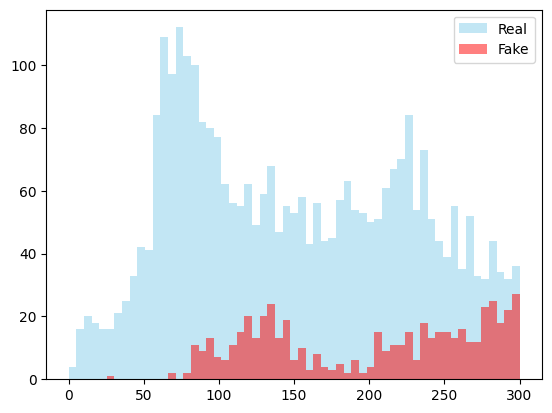

In [35]:
bins = np.linspace(0, 300, 60)
plt.hist(df[df['label']=='Real']['length'], bins, alpha=0.5, label='Real', color='skyblue')
plt.hist(df[df['label']=='Fake']['length'], bins, alpha=0.5, label='Fake', color='red')
plt.legend()
plt.show()

#### Findings
Content of Fake news is smaller than Real news

In [36]:
df

,title,text,label,content,length
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,Real,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,4222
1,,Did they post their votes for Hillary already?,Real,Did they post their votes for Hillary already?,39
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",Real,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,299
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,Fake,"Bobby Jindal, raised Hindu, uses story of Chri...",6811
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",Real,SATAN 2: Russia unvelis an image of its terrif...,1668
...,...,...,...,...,...
72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,Fake,Russians steal research on Trump in hack of U....,4098
72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",Real,WATCH: Giuliani Demands That Democrats Apolog...,3092
72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,Fake,Migrants Refuse To Leave Train At Refugee Camp...,2447
72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,Fake,Trump tussle gives unpopular Mexican leader mu...,2868


## World Cloud

Word Cloud of 'title' in dataset.
Data Exploration

In [37]:
def generate_worldcloud(df, attribute):
    attributes = ' '.join(attribute for attribute in df[attribute])
    wordcloud = WordCloud(
        background_color='white', 
        max_words=400,
        width=800, 
        height=600
    ).generate(attributes)

    plt.figure(figsize=(20, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

World cloud of title of real dataset


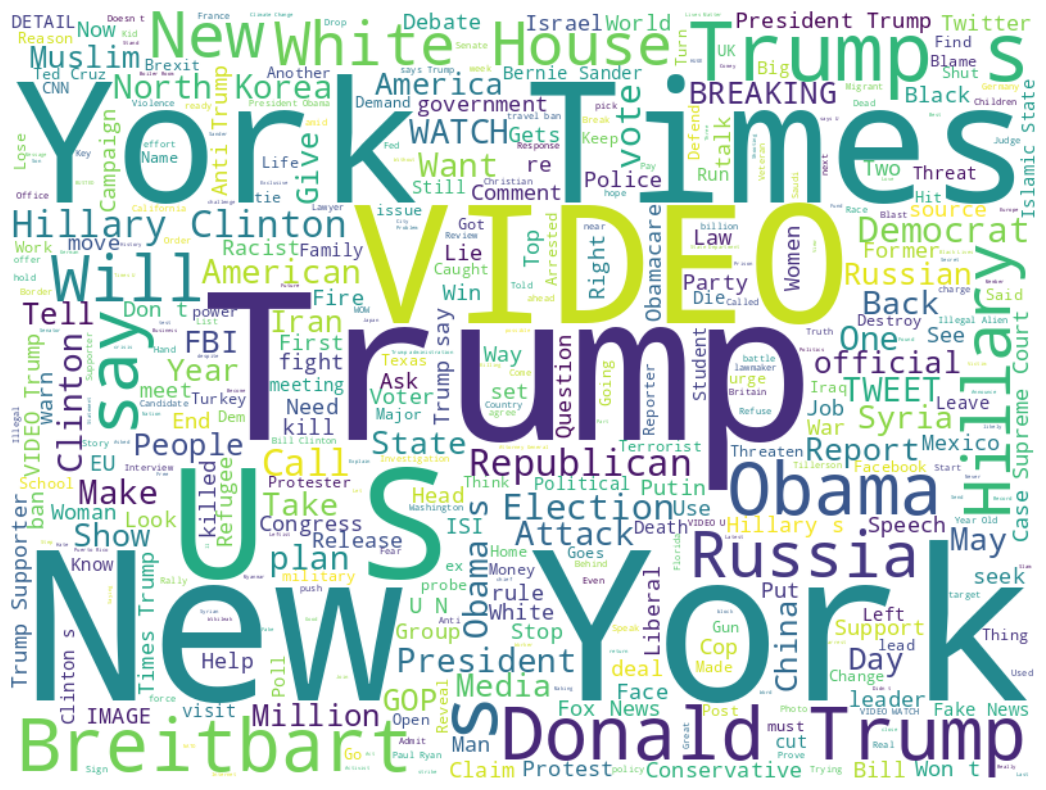

In [38]:
attribute = df.columns[0]      # title
#print(attribute)
print("World cloud of title of real dataset")
generate_worldcloud(df, attribute)

## Train, Validate and Test

In [53]:
from sklearn.model_selection import train_test_split

In [69]:
# Independent variables: 'title' and 'text'
# X = df.loc[:, df.columns != 'label']
# X = df[['title', 'text']]
# X.head()

X = df['content']
X.head()

0    LAW ENFORCEMENT ON HIGH ALERT Following Threat...
1       Did they post their votes for Hillary already?
2    UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...
3    Bobby Jindal, raised Hindu, uses story of Chri...
4    SATAN 2: Russia unvelis an image of its terrif...
Name: content, dtype: object

In [70]:
# Traget Variable: 'label'
y = df['label']
y.head()

0    Real
1    Real
2    Real
3    Fake
4    Real
Name: label, dtype: object

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=53)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(50493,)
(21641,)
(50493,)
(21641,)


### Bags of Word

In [72]:
from sklearn.feature_extraction.text import CountVectorizer

In [74]:
count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)

## Navie-Bayes Model

### Train NB Model

In [75]:
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()
nb_classifier.fit(count_train, y_train)

MultinomialNB()

### Prediction NB Model

In [77]:
predict_NB = nb_classifier.predict(count_test)

In [78]:
predict_NB

array(['Fake', 'Fake', 'Real', ..., 'Real', 'Fake', 'Real'], dtype='<U4')

### Evaluate NB Model
Evaluation of Navie Bayes Predictions

In [79]:
from sklearn.metrics import classification_report

In [80]:
print(classification_report(y_test, predict_NB))

              precision    recall  f1-score   support

        Fake       0.88      0.91      0.89     10573
        Real       0.91      0.88      0.89     11068

    accuracy                           0.89     21641
   macro avg       0.89      0.89      0.89     21641
weighted avg       0.89      0.89      0.89     21641



Accuracy achieved is 89%

### Confusion Matrix

In [90]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [91]:
cm_1 = confusion_matrix(y_test, predict_NB)
cm_1

array([[9598,  975],
       [1315, 9753]])

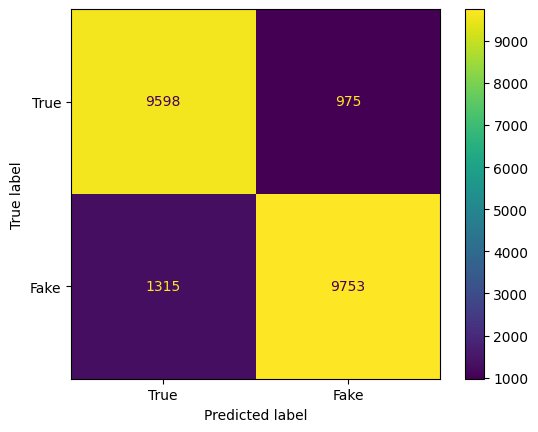

In [99]:
cm_display = ConfusionMatrixDisplay(cm_1, display_labels = ["True", "Fake"])

cm_display.plot()
plt.show()

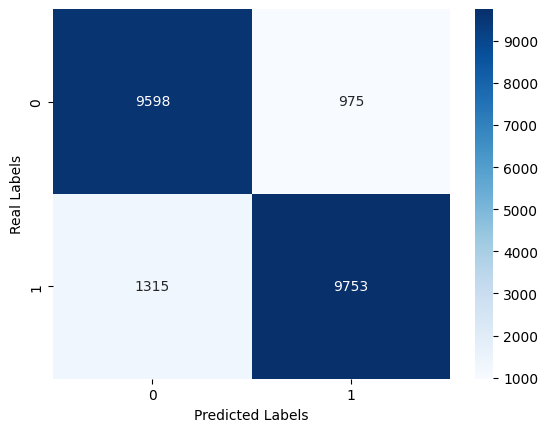

In [102]:
sns.heatmap(cm_1, annot=True, fmt='', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('Real Labels')
#plt.figure(figsize = (8,6))
plt.show()

Accuracy: 0.9397657170582935
Confusion Matrix:
[[6575  514]
 [ 355 6983]]
Classification Report:
              precision    recall  f1-score   support

        Fake       0.95      0.93      0.94      7089
        Real       0.93      0.95      0.94      7338

    accuracy                           0.94     14427
   macro avg       0.94      0.94      0.94     14427
weighted avg       0.94      0.94      0.94     14427

